#### Import Required Libraries

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import io
import base64

In [ ]:
#GYM version
gym.__version__

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'0.25.2'

**In this project** , our motivation is to explore and apply RL technique  to solve the Mountain Car problem and analyze their performance.

The goal is to reach the flag placed on top of the right hill, as such the agent is penalised with a reward of -1 for each timestep.

Episode ends when The position of the car is greater than or equal to 0.5 (the goal position on top of the right hill)



---

**We did 4 trials to reach the flag placed on the top of right hill as quickly as possible**

#### Trail 1 (Default)


Here our default trail , we used The Mountain Car environment which is part of the OpenAI Gym.

In this trial , we don't use any function to update the value state

In [ ]:
# Create the MountainCar environment
env = gym.make('MountainCar-v0')
# reset the environment
env.reset()
print(f"The high value of all observation_space {env.observation_space.high}")
print(f"The low value of all observation_space {env.observation_space.low}")
print(f"number of action that actually can take {env.action_space.n}")
#determine the position for each bucket
descrete_of_size = [20] *len(env.observation_space.high)
discrete_of_win_size=(env.observation_space.high-env.observation_space.low) /descrete_of_size
print(f"the position for each bucket will be in range{discrete_of_win_size}")
# the default position not the goal
# done mean the agent arrive to goal
done = False

The high value of all observation_space [0.6  0.07]
The low value of all observation_space [-1.2  -0.07]
number of action that actually can take 3
the position for each bucket will be in range[0.09  0.007]


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


[-0.51824814  0.00096712] -1.0
[-0.5163212  0.001927 ] -1.0
[-0.5134487   0.00287242] -1.0
[-0.50965244  0.00379631] -1.0
[-0.5049607   0.00469174] -1.0
[-0.49940866  0.00555203] -1.0
[-0.4930379   0.00637076] -1.0
[-0.48589602  0.00714187] -1.0
[-0.4780363   0.00785971] -1.0
[-0.4695173   0.00851905] -1.0
[-0.46040207  0.00911522] -1.0
[-0.45075798  0.00964408] -1.0
[-0.4406559   0.01010211] -1.0
[-0.43016943  0.01048643] -1.0
[-0.4193746   0.01079485] -1.0
[-0.40834874  0.01102585] -1.0
[-0.39717016  0.01117859] -1.0
[-0.38591722  0.01125295] -1.0
[-0.37466776  0.01124945] -1.0
[-0.3634985   0.01116926] -1.0
[-0.35248435  0.01101414] -1.0
[-0.34169793  0.01078641] -1.0
[-0.3312091   0.01048887] -1.0
[-0.32108435  0.01012473] -1.0
[-0.31138673  0.0096976 ] -1.0
[-0.30217537  0.00921137] -1.0
[-0.29350522  0.00867015] -1.0
[-0.28542694  0.00807827] -1.0
[-0.27798682  0.00744014] -1.0
[-0.27122653  0.00676027] -1.0
[-0.26518333  0.0060432 ] -1.0
[-0.25988987  0.00529347] -1.0
[-0.255374

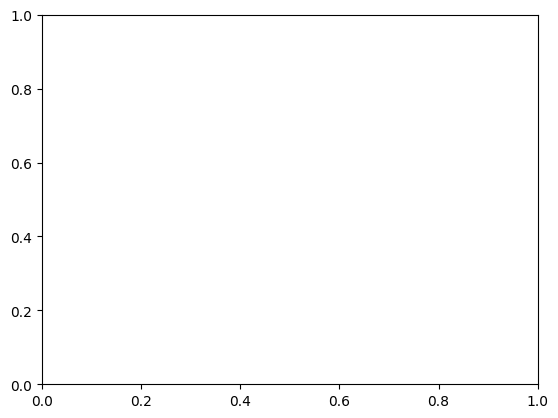

In [ ]:
"""
1- provided is a loop that iterates until the done flag is set to True.
   In each iteration, it performs the following steps:
   - Chooses action 2 (throttle forward) by setting action = 2
"""
# Initialize a figure for visualization
fig, ax = plt.subplots()
# Create an empty list to store the frames
frames = []
while not done:
    # Choose action 2 (throttle forward)
    action = 2
    new_state, reward, done, _ = env.step(action)
    print(new_state, reward)
    # Render the environment
    frame_data = env.render(mode='rgb_array')
    frames.append(frame_data)

env.close()

**From the previous output , we detect that the reward always -1 , this mean that agent fail to arrive the goal**

In [ ]:
# Function to update the frame in the animation
def update_frame(frame):
    ax.imshow(frames[frame])
    ax.axis('off')
    ax.set_title(f"Frame: {frame+1}")

# Create the animation
animation = FuncAnimation(fig, update_frame, frames=len(frames), interval=100)

# Display the animation in the output
HTML(animation.to_html5_video())

- **From the output , detect that the car trying to get up the mountain , but fail because no enough power help the car to reach to goal**.

- **The goal is eventually make the agent arrive to flag area**.

#### Trial 2 (Handle q_table)

Here we will intialize a q_table, it's a large table that gives us any combination of states.

For every  combination of state of position and the velocity  , we will look on this table and trying to exploit the environment and then pick one with the maximum largest q_value.

In [ ]:
print(new_state)

[-0.27432844 -0.00638582]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
<ipython-input-8-6562a5d3ccc9>:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional inform

Number of frames: 10199


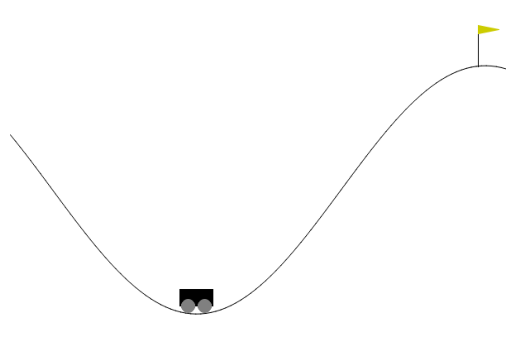

In [ ]:
# Create the MountainCar environment again
env = gym.make('MountainCar-v0')
env.reset()

# Starting updating the random q_value
learning_rate = 0.1
# How it is important to find future actions
discount = 0.95
# Number of trials (arrive at terminal state)
episodes = 10000

# Determine the position for each bucket
discrete_of_size = [20] * len(env.observation_space.high)
discrete_of_win_size = (env.observation_space.high - env.observation_space.low) / discrete_of_size

# Initialize Q-table with random values
q_table = np.random.uniform(low=-2, high=0, size=(discrete_of_size + [env.action_space.n]))

# Convert continuous state into discrete state
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_of_win_size
    return tuple(discrete_state.astype(np.int))

discrete_state = get_discrete_state(env.reset())

# Create an empty list to store the frames
frames = []

# Run the episodes
for episode in range(episodes):
    done = False

    while not done:
        # Choose action based on maximum values
        action = np.argmax(q_table[discrete_state])
        new_state, reward, done, _ = env.step(action)
        new_discrete_state = get_discrete_state(new_state)

        # Render the environment and capture the frame
        frames.append(env.render(mode='rgb_array'))

        if not done:
            # Max future Q multiplied by discount (weight)
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            # Formula for calculating the new Q-value
            new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount * max_future_q)
            # Update Q-table with new Q-value
            q_table[discrete_state + (action,)] = new_q
        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action,)] = 0
        discrete_state = new_discrete_state

env.close()

# Create the animation
fig, ax = plt.subplots()
im = ax.imshow(frames[0])
ax.axis('off')

frame_count = len(frames)
frame_text = ax.text(10, 10, f'Frame: 0 / {frame_count}', color='white')

def update_frame(frame):
    im.set_data(frames[frame])
    frame_text.set_text(f'Frame: {frame} / {frame_count}')

animation = FuncAnimation(fig, update_frame, frames=len(frames), interval=10, repeat=False)

# Save the animation as an MP4 video
video_output = 'mountaincar_video.mp4'
animation.save(video_output, writer='ffmpeg')

# Read the video file and encode it as base64
video_data = open(video_output, 'rb').read()
video_base64 = base64.b64encode(video_data).decode('utf-8')

# Generate the HTML code to display the video
html_video = f'<video controls autoplay loop><source src="data:video/mp4;base64,{video_base64}" type="video/mp4"></video>'

# Display the HTML video and frame count
from IPython.display import display, HTML
display(HTML(html_video))
print(f'Number of frames: {frame_count}')

We can detect that the agent starts exploring the environment and make a back movement but but can't reach the goal in this trial.

#### Trial 3 (More EPISODES iteration)

We want to iterate over episodes ,because runs one time and that is not useful

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
<ipython-input-9-10f8377dc48a>:30: Deprecat

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000


Number of frames: 1906


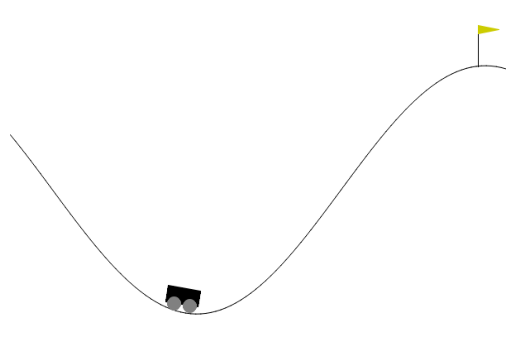

In [ ]:
# Create the MountainCar environment again
env = gym.make('MountainCar-v0')

# starting updating the random q_value
learning_rate = 0.1
# how it is important to find future actions
discount = 0.95
# number of trials (arrive at terminal state)
episodes = 25000
# every 2000 episodes let us know the agent is still alive
show_every = 2000

# determine the position for each bucket
discrete_of_size = [20] * len(env.observation_space.high)
discrete_of_win_size = (env.observation_space.high - env.observation_space.low) / discrete_of_size

# initialize q_table
q_table = np.random.uniform(low=-2, high=0, size=(discrete_of_size + [env.action_space.n]))

# Convert continuous state into discrete state
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_of_win_size
    return tuple(discrete_state.astype(np.int))

# Create an empty list to store the frames
frames = []

# iterate over episodes
for episode in range(episodes):
    if episode % show_every == 0:
        print(episode)
        render = True
    else:
        render = False

    discrete_state = get_discrete_state(env.reset())
    done = False
    while not done:
        # Choose action based on maximum values
        action = np.argmax(q_table[discrete_state])
        new_state, reward, done, _ = env.step(action)
        new_discrete_state = get_discrete_state(new_state)

        if render:
            # Render the environment and capture the frame
            frames.append(env.render(mode='rgb_array'))

        if not done:
            # Max future Q multiplied by discount (weight)
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            # Formula for calculating the new Q-value
            new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount * max_future_q)
            # Update q_table with new q_value
            q_table[discrete_state + (action,)] = new_q
        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action,)] = 0
        discrete_state = new_discrete_state

env.close()

# Create the animation
fig, ax = plt.subplots()
im = ax.imshow(frames[0])
ax.axis('off')

frame_count = len(frames)
frame_text = ax.text(10, 10, f'Frame: 0 / {frame_count}', color='white')

def update_frame(frame):
    im.set_data(frames[frame])
    frame_text.set_text(f'Frame: {frame} / {frame_count}')

animation = FuncAnimation(fig, update_frame, frames=len(frames), interval=10, repeat=False)

# Save the animation as an MP4 video
video_output = 'mountaincar_video.mp4'
animation.save(video_output, writer='ffmpeg')

# Read the video file and encode it as base64
video_data = open(video_output, 'rb').read()
video_base64 = base64.b64encode(video_data).decode('utf-8')

# Generate the HTML code to display the video
html_video = f'<video controls autoplay loop><source src="data:video/mp4;base64,{video_base64}" type="video/mp4"></video>'

# Display the HTML video and frame count
from IPython.display import display, HTML
display(HTML(html_video))
print(f'Number of frames: {frame_count}')


**Here after this trial we are in a good state as we reach the goal but the agent make it quickly , because we need one more thing usually and it is called Epsilon that mean how much the exploration(randomness).**

#### Trial 4 (Adding EPSILON)

the benefit of this trial , still doing some exploration because as soon as it finds one way to the flag , it will be super optimize very quickly for that way of getting the to flag

0


<ipython-input-7-c5722a502eb7>:41: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(



 Episode: 0
 average: -0.1
 min: -200.0
 max: -200.0
Cumulative Reward: -200.0
Number of Steps: 1

Test Performance - Episode: 0 Mean Reward: -1.0 Mean Time-Steps: 200.0
*********************************************

Test Performance - Episode: 10 Mean Reward: -1.0 Mean Time-Steps: 200.0
*********************************************

Test Performance - Episode: 20 Mean Reward: -1.0 Mean Time-Steps: 200.0
*********************************************

Test Performance - Episode: 30 Mean Reward: -1.0 Mean Time-Steps: 200.0
*********************************************

Test Performance - Episode: 40 Mean Reward: -1.0 Mean Time-Steps: 200.0
*********************************************

Test Performance - Episode: 50 Mean Reward: -1.0 Mean Time-Steps: 200.0
*********************************************

Test Performance - Episode: 60 Mean Reward: -1.0 Mean Time-Steps: 200.0
*********************************************

Test Performance - Episode: 70 Mean Reward: -1.0 Mean Time-Steps: 20

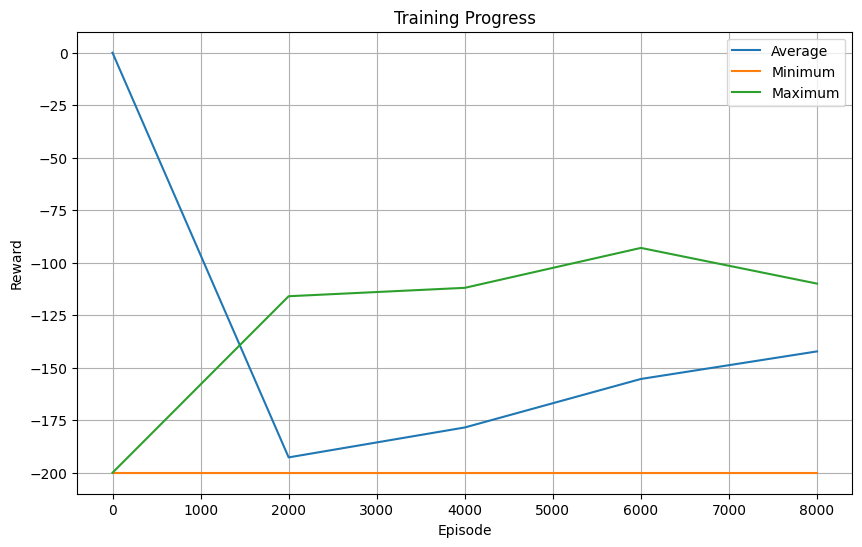

Number of frames: 812


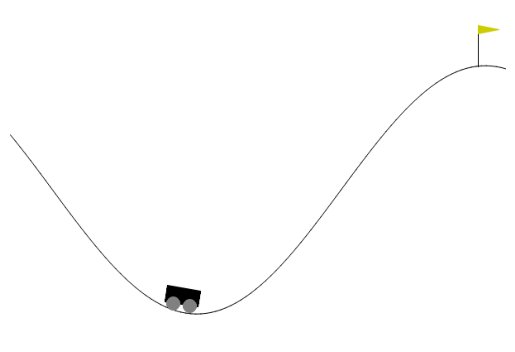

In [ ]:
# Create the MountainCar environment again
env = gym.make('MountainCar-v0')

# starting updating the random q_value
learning_rate = 0.1
# how it is important to find future actions
discount = 0.95
# number of trials (arrive at terminal state)
episodes = 10000
# every 2000 episodes let us know the agent is still alive
show_every = 2000
# determine the position for each bucket
discrete_of_size = [20] * len(env.observation_space.high)
discrete_of_win_size = (env.observation_space.high - env.observation_space.low) / discrete_of_size
# the range of epsilon between 0 and 1
# higher epsilon mean perform a random action
epsilon = 0.5
# start epsilon
start_epsilon = 1
# end_ psilon
end_epsilon = episodes // 2
epsilon_decay_value = epsilon / (end_epsilon - start_epsilon)
# initialize q_table
q_table = np.random.uniform(low=-2, high=0, size=(discrete_of_size + [env.action_space.n]))

# we will have episode rewards that will be just contains episodes reward as a list
ep_rewards = []
# dictionary that track each episode number and compute (average - min - max) reward for each episode
aggregate_ep_rewards = {'ep': [], 'avg': [], 'min': [], 'max': []}

# Convert continuous state into discrete state
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_of_win_size
    return tuple(discrete_state.astype(np.int))

# Create an empty list to store the frames
frames = []

# lists to store cumulative rewards and time-steps per episode
cumulative_rewards = []
time_steps_per_episode = []

# iterate over episodes
for episode in range(episodes):
    episode_reward = 0
    if episode % show_every == 0:
        print(episode)
        render = True
    else:
        render = False

    discrete_state = get_discrete_state(env.reset())
    done = False
    time_steps = 0
    while not done:
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)

        # Choose action based on maximum values
        action = np.argmax(q_table[discrete_state])
        new_state, reward, done, _ = env.step(action)
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_state)

        if render:
            # Render the environment and capture the frame
            frames.append(env.render(mode='rgb_array'))

        if not done:
            # Max future Q multiplied by discount (weight)
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            # Formula for calculating the new Q-value
            new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount * max_future_q)
            # Update q_table with new q_value
            q_table[discrete_state + (action,)] = new_q
        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action,)] = 0
        discrete_state = new_discrete_state
        time_steps += 1

    if end_epsilon >= episode >= start_epsilon:
        epsilon -= epsilon_decay_value

    ep_rewards.append(episode_reward)
    if not episode % show_every:
        average_reward = sum(ep_rewards[-show_every:]) / show_every
        aggregate_ep_rewards['ep'].append(episode)
        aggregate_ep_rewards['avg'].append(average_reward)
        aggregate_ep_rewards['min'].append(min(ep_rewards[-show_every:]))
        aggregate_ep_rewards['max'].append(max(ep_rewards[-show_every:]))
        cumulative_reward = sum(ep_rewards)
        time_steps = len(ep_rewards)
        print(f"\n Episode: {episode}\n average: {average_reward}\n min: {min(ep_rewards[-show_every:])}\n max: {max(ep_rewards[-show_every:])}")
        print(f"Cumulative Reward: {cumulative_reward}")
        print(f"Number of Steps: {time_steps}")

    cumulative_rewards.append(np.sum(ep_rewards))
    time_steps_per_episode.append(time_steps)

    if episode % 10 == 0:
        try:
            test_episodes = 5
            test_rewards = []
            test_time_steps = []
            for _ in range(test_episodes):
                state = env.reset()
                done = False
                time_steps = 0
                while not done:
                    action = np.argmax(q_table[get_discrete_state(state)])
                    state, reward, done, _ = env.step(action)
                    time_steps += 1
                    test_rewards.append(reward)
                test_time_steps.append(time_steps)

            mean_test_reward = np.mean(test_rewards)
            mean_test_time_steps = np.mean(test_time_steps)

            print(f"\nTest Performance - Episode: {episode} Mean Reward: {mean_test_reward} Mean Time-Steps: {mean_test_time_steps}")
            print("*********************************************")
        except KeyboardInterrupt:
            print("Testing interrupted by the user.")
            break

env.close()

# -------------------------------------------
# plotting training progress
plt.figure(figsize=(10, 6))
plt.plot(aggregate_ep_rewards['ep'], aggregate_ep_rewards['avg'], label="Average")
plt.plot(aggregate_ep_rewards['ep'], aggregate_ep_rewards['min'], label="Minimum")
plt.plot(aggregate_ep_rewards['ep'], aggregate_ep_rewards['max'], label="Maximum")

# Find optimal performance
optimal_reward_episode = aggregate_ep_rewards['ep'][np.argmax(aggregate_ep_rewards['max'])]
optimal_time_steps_episode = aggregate_ep_rewards['ep'][np.argmin(aggregate_ep_rewards['min'])]

# Highlight optimal performance in dotted lines
# plt.axvline(x=optimal_reward_episode, linestyle='--', color='r', label='Optimal Reward')
# plt.axvline(x=optimal_time_steps_episode, linestyle='--', color='b', label='Optimal Time-Steps')

plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Training Progress")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# -------------------------------------------
# Create the animation
fig, ax = plt.subplots()
im = ax.imshow(frames[0])
ax.axis('off')

frame_count = len(frames)
frame_text = ax.text(10, 10, f'Frame: 0 / {frame_count}', color='white')
def update_frame(frame):
    im.set_data(frames[frame])
    frame_text.set_text(f'Frame: {frame} / {frame_count}')

# Increase the interval value for slower speed
animation = FuncAnimation(fig, update_frame, frames=len(frames), interval=50, repeat=False)

# Save the animation as an MP4 video
video_output = 'mountaincar_video.mp4'
animation.save(video_output, writer='ffmpeg')

# Read the video file and encode it as base64
video_data = open(video_output, 'rb').read()
video_base64 = base64.b64encode(video_data).decode('utf-8')

# Generate the HTML code to display the video
html_video = f'<video controls autoplay loop><source src="data:video/mp4;base64,{video_base64}" type="video/mp4"></video>'

# Display the HTML video and frame count
from IPython.display import display, HTML
display(HTML(html_video))
print(f'Number of frames: {frame_count}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**We did it finally :) , the agent success to reach the goal in the best way and we noticed that the agent learned how to reach the goal better than the previous trial.**

**Plotting results of final trial**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


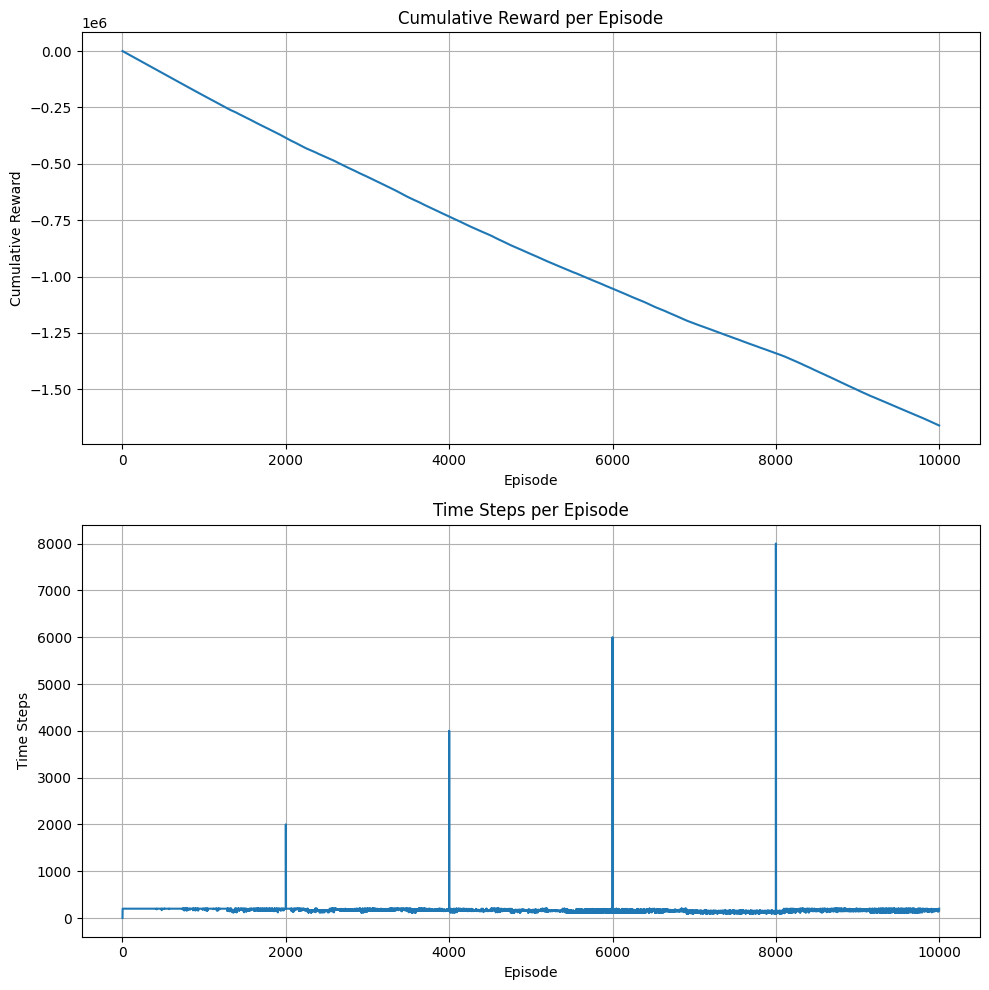

In [ ]:
# plotting training progress
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot cumulative reward per episode
ax1.plot(np.arange(episodes), cumulative_rewards)
ax1.set_xlabel("Episode")
ax1.set_ylabel("Cumulative Reward")
ax1.set_title("Cumulative Reward per Episode")
ax1.grid(True)

# Plot time-steps per episode
ax2.plot(np.arange(episodes), time_steps_per_episode)
ax2.set_xlabel("Episode")
ax2.set_ylabel("Time Steps")
ax2.set_title("Time Steps per Episode")
ax2.grid(True)

plt.tight_layout()
plt.show()

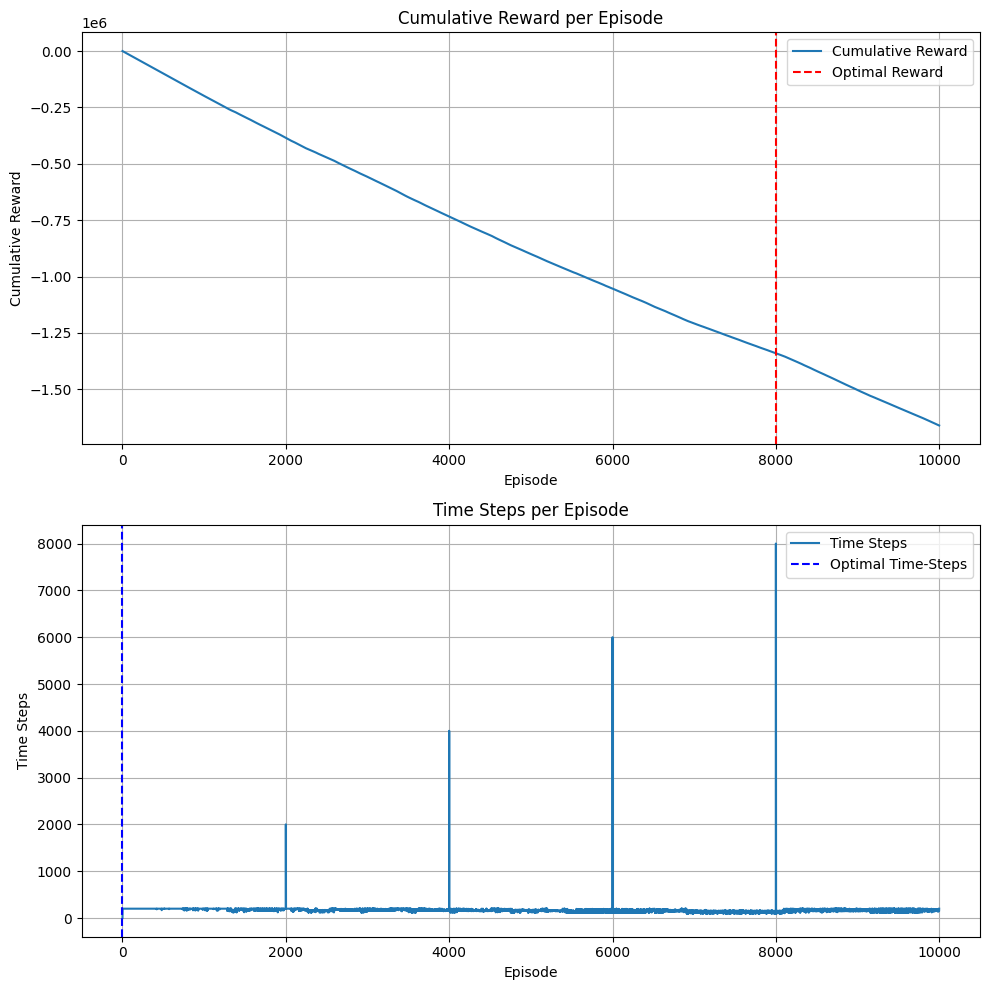

In [ ]:
# -------------------------------------------
# plotting training progress
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot cumulative reward per episode
ax1.plot(np.arange(episodes), cumulative_rewards, label="Cumulative Reward")
optimal_reward_episode = aggregate_ep_rewards['ep'][np.argmax(aggregate_ep_rewards['max'])]
ax1.axvline(x=optimal_reward_episode, linestyle='--', color='r', label='Optimal Reward')
ax1.set_xlabel("Episode")
ax1.set_ylabel("Cumulative Reward")
ax1.set_title("Cumulative Reward per Episode")
ax1.legend(loc="best")
ax1.grid(True)

# Plot time-steps per episode
ax2.plot(np.arange(episodes), time_steps_per_episode, label="Time Steps")
optimal_time_steps_episode = aggregate_ep_rewards['ep'][np.argmin(aggregate_ep_rewards['min'])]
ax2.axvline(x=optimal_time_steps_episode, linestyle='--', color='b', label='Optimal Time-Steps')
ax2.set_xlabel("Episode")
ax2.set_ylabel("Time Steps")
ax2.set_title("Time Steps per Episode")
ax2.legend(loc="best")
ax2.grid(True)

plt.tight_layout()
plt.show()

#### Hyperparameter Tuning & plotting

Here will handle hyperparameter search for:
*   Learning rates
*   discount factors
*   epsilon values
*   the number of episodes

Episode: 100 Average Reward: -200.0
Episode: 200 Average Reward: -200.0
Episode: 300 Average Reward: -200.0
Episode: 400 Average Reward: -200.0
Episode: 500 Average Reward: -200.0
Episode: 600 Average Reward: -199.64
Episode: 700 Average Reward: -199.97
Episode: 800 Average Reward: -197.2
Episode: 900 Average Reward: -196.62
Episode: 1000 Average Reward: -198.29
Episode: 1100 Average Reward: -199.07
Episode: 1200 Average Reward: -197.12
Episode: 1300 Average Reward: -192.36
Episode: 1400 Average Reward: -199.18
Episode: 1500 Average Reward: -188.04
Episode: 1600 Average Reward: -177.25
Episode: 1700 Average Reward: -192.83
Episode: 1800 Average Reward: -195.62
Episode: 1900 Average Reward: -184.52
Episode: 2000 Average Reward: -195.01
Episode: 2100 Average Reward: -184.17
Episode: 2200 Average Reward: -199.59
Episode: 2300 Average Reward: -199.24
Episode: 2400 Average Reward: -189.74
Episode: 2500 Average Reward: -192.47
Episode: 2600 Average Reward: -190.19
Episode: 2700 Average Rewar

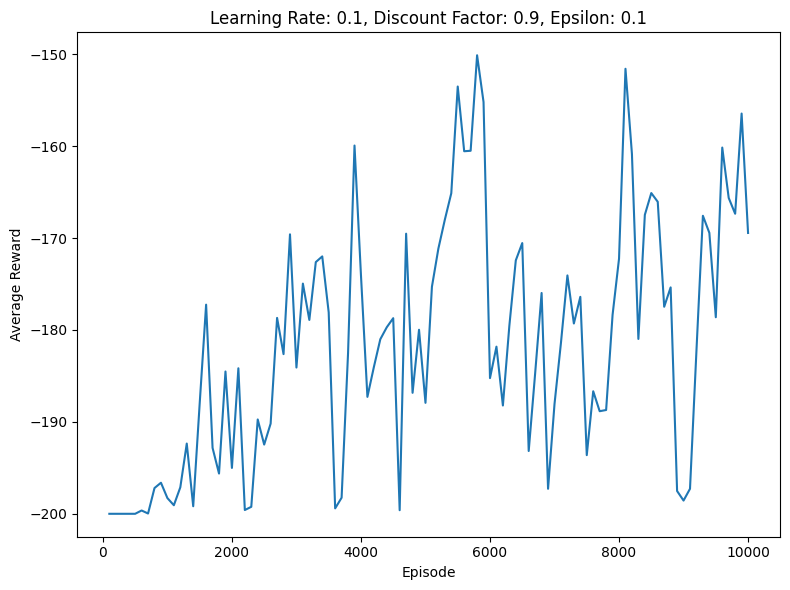

Episode: 100 Average Reward: -200.0
Episode: 200 Average Reward: -200.0
Episode: 300 Average Reward: -200.0
Episode: 400 Average Reward: -200.0
Episode: 500 Average Reward: -200.0
Episode: 600 Average Reward: -200.0
Episode: 700 Average Reward: -199.58
Episode: 800 Average Reward: -198.73
Episode: 900 Average Reward: -200.0
Episode: 1000 Average Reward: -200.0
Episode: 1100 Average Reward: -200.0
Episode: 1200 Average Reward: -192.89
Episode: 1300 Average Reward: -193.62
Episode: 1400 Average Reward: -197.51
Episode: 1500 Average Reward: -199.5
Episode: 1600 Average Reward: -196.14
Episode: 1700 Average Reward: -194.07
Episode: 1800 Average Reward: -192.02
Episode: 1900 Average Reward: -189.46
Episode: 2000 Average Reward: -193.52
Episode: 2100 Average Reward: -196.1
Episode: 2200 Average Reward: -190.01
Episode: 2300 Average Reward: -195.84
Episode: 2400 Average Reward: -193.07
Episode: 2500 Average Reward: -187.05
Episode: 2600 Average Reward: -194.85
Episode: 2700 Average Reward: -1

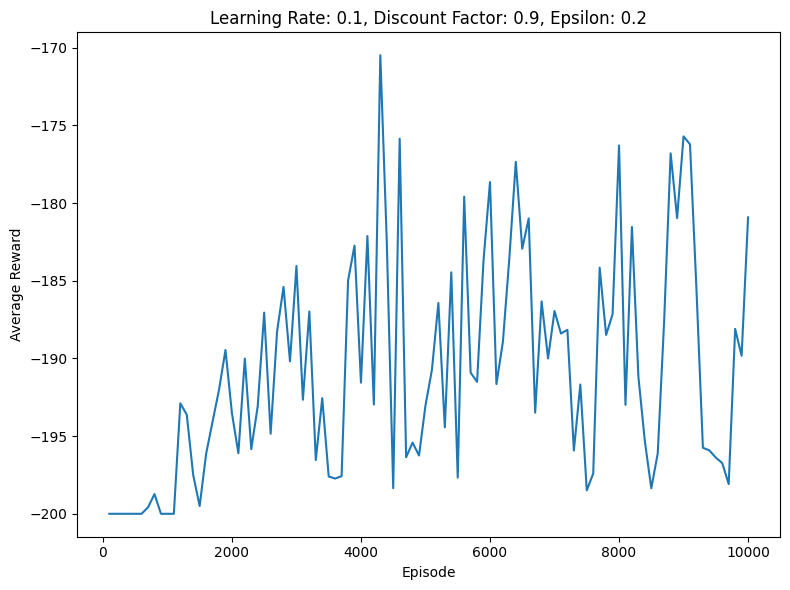

Episode: 100 Average Reward: -200.0
Episode: 200 Average Reward: -200.0
Episode: 300 Average Reward: -200.0
Episode: 400 Average Reward: -200.0
Episode: 500 Average Reward: -200.0
Episode: 600 Average Reward: -199.86
Episode: 700 Average Reward: -200.0
Episode: 800 Average Reward: -197.75
Episode: 900 Average Reward: -195.64
Episode: 1000 Average Reward: -199.88
Episode: 1100 Average Reward: -197.88
Episode: 1200 Average Reward: -197.34
Episode: 1300 Average Reward: -190.8
Episode: 1400 Average Reward: -193.82
Episode: 1500 Average Reward: -189.46
Episode: 1600 Average Reward: -193.53
Episode: 1700 Average Reward: -192.96
Episode: 1800 Average Reward: -193.68
Episode: 1900 Average Reward: -190.23
Episode: 2000 Average Reward: -184.61
Episode: 2100 Average Reward: -197.08
Episode: 2200 Average Reward: -198.89
Episode: 2300 Average Reward: -185.89
Episode: 2400 Average Reward: -191.64
Episode: 2500 Average Reward: -179.37
Episode: 2600 Average Reward: -185.23
Episode: 2700 Average Reward

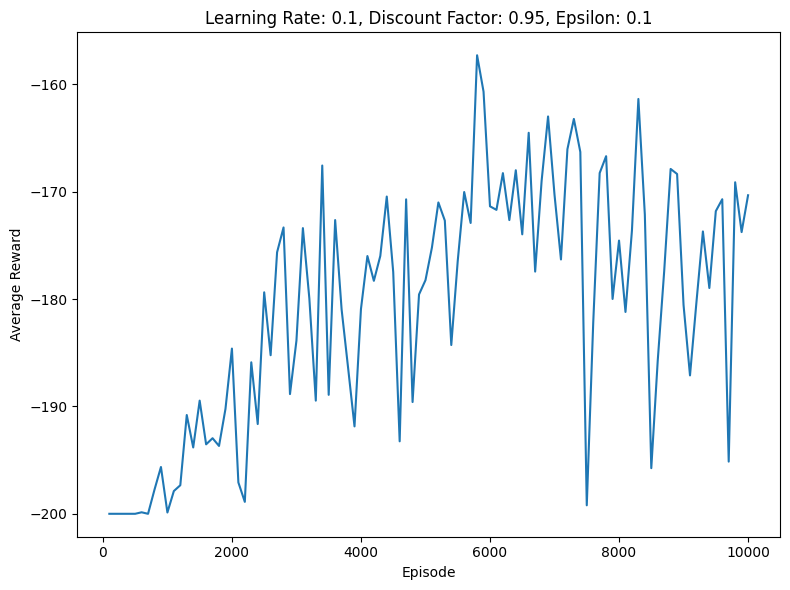

Episode: 100 Average Reward: -200.0
Episode: 200 Average Reward: -200.0
Episode: 300 Average Reward: -200.0
Episode: 400 Average Reward: -200.0
Episode: 500 Average Reward: -200.0
Episode: 600 Average Reward: -200.0
Episode: 700 Average Reward: -199.51
Episode: 800 Average Reward: -198.29
Episode: 900 Average Reward: -199.83
Episode: 1000 Average Reward: -198.93
Episode: 1100 Average Reward: -199.55
Episode: 1200 Average Reward: -197.52
Episode: 1300 Average Reward: -199.01
Episode: 1400 Average Reward: -194.82
Episode: 1500 Average Reward: -193.52
Episode: 1600 Average Reward: -187.49
Episode: 1700 Average Reward: -196.05
Episode: 1800 Average Reward: -195.22
Episode: 1900 Average Reward: -191.31
Episode: 2000 Average Reward: -198.34
Episode: 2100 Average Reward: -196.34
Episode: 2200 Average Reward: -193.43
Episode: 2300 Average Reward: -196.26
Episode: 2400 Average Reward: -189.68
Episode: 2500 Average Reward: -193.92
Episode: 2600 Average Reward: -192.82
Episode: 2700 Average Rewar

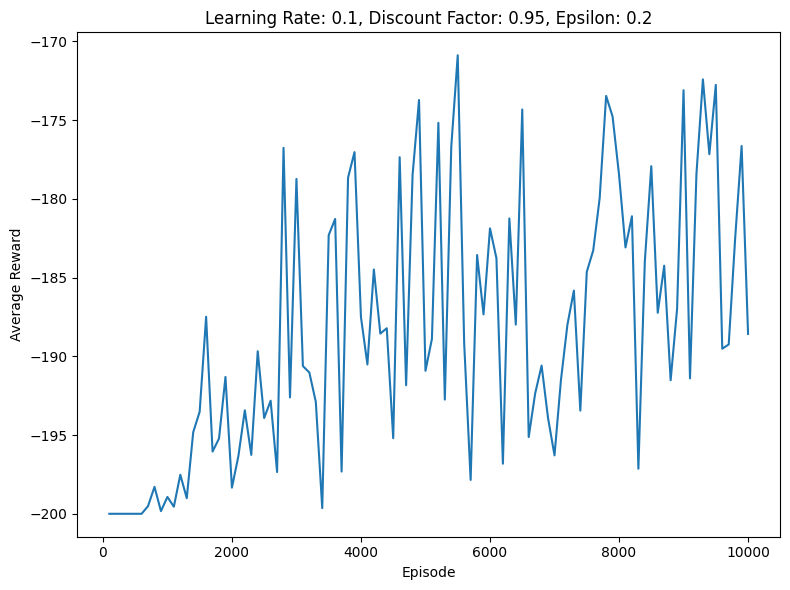

Episode: 100 Average Reward: -200.0
Episode: 200 Average Reward: -200.0
Episode: 300 Average Reward: -200.0
Episode: 400 Average Reward: -200.0
Episode: 500 Average Reward: -198.57
Episode: 600 Average Reward: -198.86
Episode: 700 Average Reward: -199.51
Episode: 800 Average Reward: -193.9
Episode: 900 Average Reward: -194.82
Episode: 1000 Average Reward: -198.19
Episode: 1100 Average Reward: -198.05
Episode: 1200 Average Reward: -198.16
Episode: 1300 Average Reward: -199.61
Episode: 1400 Average Reward: -193.58
Episode: 1500 Average Reward: -193.89
Episode: 1600 Average Reward: -195.83
Episode: 1700 Average Reward: -199.47
Episode: 1800 Average Reward: -191.22
Episode: 1900 Average Reward: -194.07
Episode: 2000 Average Reward: -190.27
Episode: 2100 Average Reward: -189.57
Episode: 2200 Average Reward: -175.4
Episode: 2300 Average Reward: -190.81
Episode: 2400 Average Reward: -195.61
Episode: 2500 Average Reward: -178.3
Episode: 2600 Average Reward: -193.28
Episode: 2700 Average Reward

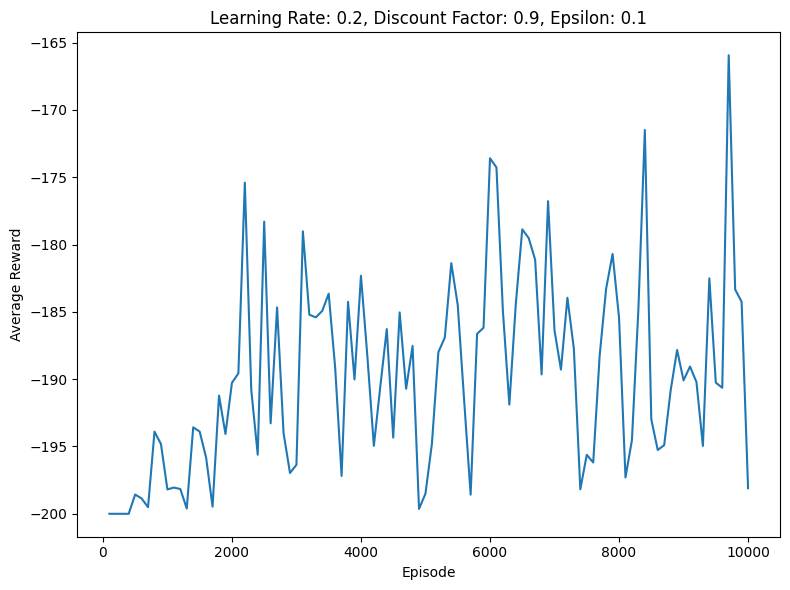

Episode: 100 Average Reward: -200.0
Episode: 200 Average Reward: -200.0
Episode: 300 Average Reward: -200.0
Episode: 400 Average Reward: -200.0
Episode: 500 Average Reward: -200.0
Episode: 600 Average Reward: -199.15
Episode: 700 Average Reward: -199.19
Episode: 800 Average Reward: -199.69
Episode: 900 Average Reward: -195.2
Episode: 1000 Average Reward: -199.28
Episode: 1100 Average Reward: -198.46
Episode: 1200 Average Reward: -199.36
Episode: 1300 Average Reward: -197.27
Episode: 1400 Average Reward: -197.65
Episode: 1500 Average Reward: -198.69
Episode: 1600 Average Reward: -199.9
Episode: 1700 Average Reward: -196.51
Episode: 1800 Average Reward: -196.31
Episode: 1900 Average Reward: -193.47
Episode: 2000 Average Reward: -195.11
Episode: 2100 Average Reward: -199.16
Episode: 2200 Average Reward: -198.44
Episode: 2300 Average Reward: -197.56
Episode: 2400 Average Reward: -198.74
Episode: 2500 Average Reward: -198.07
Episode: 2600 Average Reward: -198.18
Episode: 2700 Average Reward

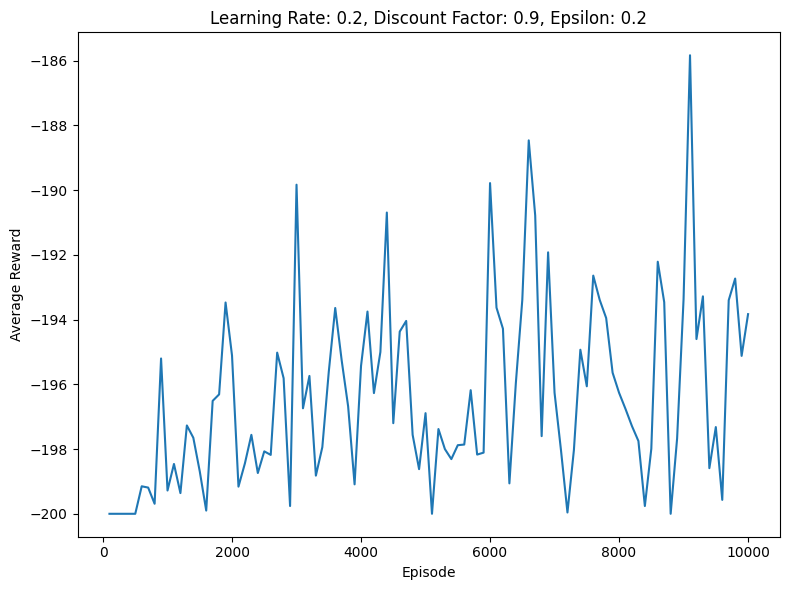

Episode: 100 Average Reward: -200.0
Episode: 200 Average Reward: -200.0
Episode: 300 Average Reward: -200.0
Episode: 400 Average Reward: -199.17
Episode: 500 Average Reward: -200.0
Episode: 600 Average Reward: -198.73
Episode: 700 Average Reward: -195.83
Episode: 800 Average Reward: -199.11
Episode: 900 Average Reward: -192.99
Episode: 1000 Average Reward: -199.12
Episode: 1100 Average Reward: -194.52
Episode: 1200 Average Reward: -190.71
Episode: 1300 Average Reward: -185.16
Episode: 1400 Average Reward: -188.7
Episode: 1500 Average Reward: -192.85
Episode: 1600 Average Reward: -188.22
Episode: 1700 Average Reward: -182.01
Episode: 1800 Average Reward: -194.28
Episode: 1900 Average Reward: -194.12
Episode: 2000 Average Reward: -182.27
Episode: 2100 Average Reward: -192.8
Episode: 2200 Average Reward: -194.77
Episode: 2300 Average Reward: -188.55
Episode: 2400 Average Reward: -194.63
Episode: 2500 Average Reward: -174.62
Episode: 2600 Average Reward: -173.87
Episode: 2700 Average Rewar

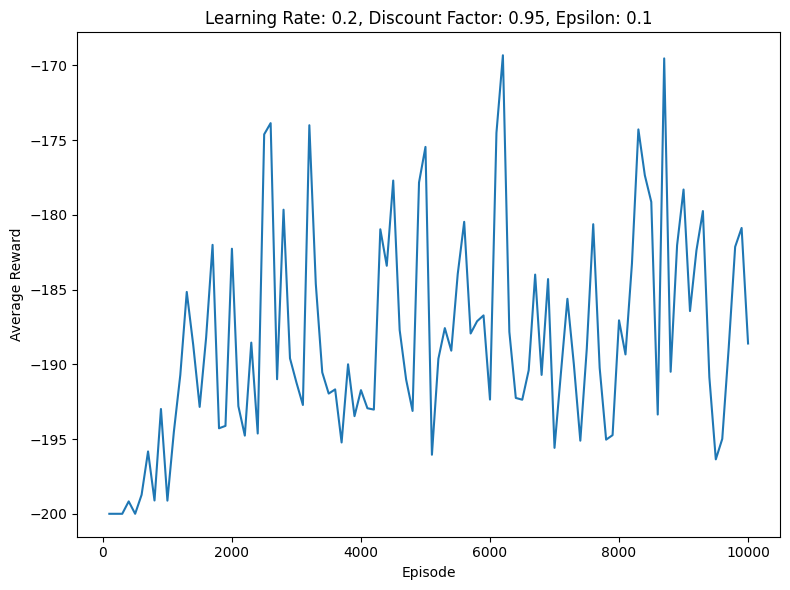

Episode: 100 Average Reward: -200.0
Episode: 200 Average Reward: -200.0
Episode: 300 Average Reward: -200.0
Episode: 400 Average Reward: -200.0
Episode: 500 Average Reward: -199.72
Episode: 600 Average Reward: -199.62
Episode: 700 Average Reward: -199.67
Episode: 800 Average Reward: -199.65
Episode: 900 Average Reward: -199.02
Episode: 1000 Average Reward: -197.65
Episode: 1100 Average Reward: -198.17
Episode: 1200 Average Reward: -198.32
Episode: 1300 Average Reward: -197.86
Episode: 1400 Average Reward: -197.94
Episode: 1500 Average Reward: -198.24
Episode: 1600 Average Reward: -198.14
Episode: 1700 Average Reward: -196.17
Episode: 1800 Average Reward: -199.24
Episode: 1900 Average Reward: -197.51
Episode: 2000 Average Reward: -192.75
Episode: 2100 Average Reward: -199.16
Episode: 2200 Average Reward: -191.32
Episode: 2300 Average Reward: -189.81
Episode: 2400 Average Reward: -200.0
Episode: 2500 Average Reward: -198.27
Episode: 2600 Average Reward: -192.0
Episode: 2700 Average Rewar

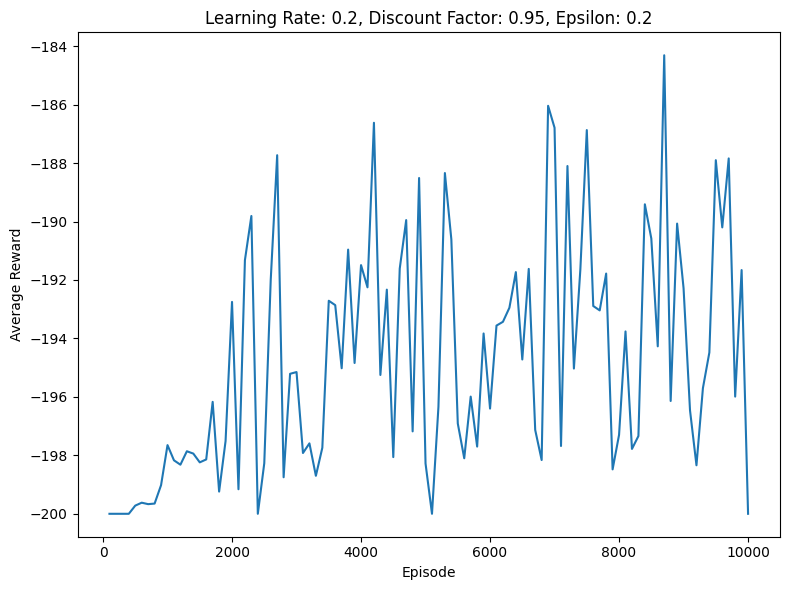

In [ ]:
# Create the MountainCar environment
env = gym.make('MountainCar-v0')

# Hyperparameters
learning_rates = [0.1, 0.2]
discount_factors = [0.9, 0.95]
epsilon_values = [0.1, 0.2]
episodes = 10000  # Define the number of episodes
show_every = 100

# Discretize the observation space
discrete_size = [20] * len(env.observation_space.low)
discrete_win_size = (env.observation_space.high - env.observation_space.low) / discrete_size

# Function to convert continuous state to discrete state
def get_discrete_state(state):
    discrete_state = ((state - env.observation_space.low) / discrete_win_size).astype(int)
    return tuple(discrete_state)

# Function to train the agent with given hyperparameters
def train_agent(learning_rate, discount_factor, epsilon):
    # Initialize Q-table
    q_table = np.zeros(discrete_size + [env.action_space.n])

    # Tracking performance over episodes
    episode_rewards = []
    avg_rewards = []

    for episode in range(episodes):
        # Initialize episode-specific variables
        episode_reward = 0
        state = get_discrete_state(env.reset())
        done = False

        while not done:
            if np.random.random() > epsilon:
                action = np.argmax(q_table[state])
            else:
                action = np.random.randint(0, env.action_space.n)

            new_state, reward, done, _ = env.step(action)
            episode_reward += reward

            new_state = get_discrete_state(new_state)

            # Update Q-table using Q-learning algorithm
            q_table[state + (action,)] += learning_rate * (reward + discount_factor * np.max(q_table[new_state]) - q_table[state + (action,)])

            state = new_state

        episode_rewards.append(episode_reward)

        if (episode + 1) % show_every == 0:
            avg_reward = np.mean(episode_rewards[-show_every:])
            avg_rewards.append(avg_reward)
            print(f"Episode: {episode+1} Average Reward: {avg_reward}")

    return avg_rewards

# Perform hyperparameter search and plot the results
for learning_rate in learning_rates:
    for discount_factor in discount_factors:
        for epsilon in epsilon_values:
            avg_rewards = train_agent(learning_rate, discount_factor, epsilon)

            fig, ax = plt.subplots(figsize=(8, 6))
            ax.plot(range(show_every, episodes+1, show_every), avg_rewards)
            ax.set_title(f'Learning Rate: {learning_rate}, Discount Factor: {discount_factor}, Epsilon: {epsilon}')
            ax.set_xlabel('Episode')
            ax.set_ylabel('Average Reward')

            plt.tight_layout()
            plt.show()

env.close()


**Plotting the average reward for different Hyperparameters**

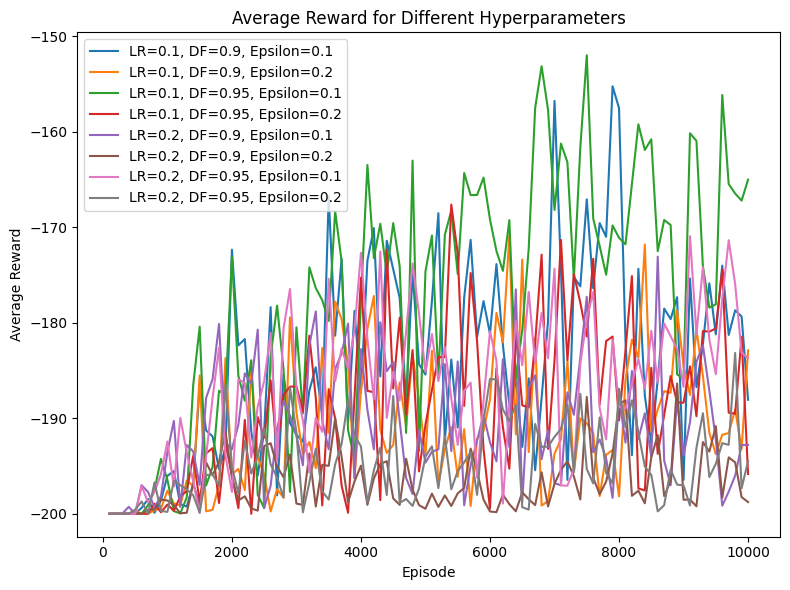

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

for learning_rate in learning_rates:
    for discount_factor in discount_factors:
        for epsilon in epsilon_values:
            avg_rewards = train_agent(learning_rate, discount_factor, epsilon)

            ax.plot(range(show_every, episodes+1, show_every), avg_rewards, label=f'LR={learning_rate}, DF={discount_factor}, Epsilon={epsilon}')

ax.set_title('Average Reward for Different Hyperparameters')
ax.set_xlabel('Episode')
ax.set_ylabel('Average Reward')
ax.legend()

plt.tight_layout()
plt.show()

env.close()
